In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import numpy as np
plt.style.use('ggplot')

The dataset is the German Credi Risk from Kaggle. It can be found at
<c>https://www.kaggle.com/uciml/german-credit/version/1 </c>

In [2]:
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df = df.drop(labels=['Unnamed: 0'], axis = 1)

Firstly we state the description of the attributes 
<ol>
  <li>Age (numeric)</li>
  <li>Sex (text: male, female)</li>
  <li>Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)</li>
  <li>Housing (text: own, rent, or free)</li>
  <li>Saving accounts (text: little, moderate, quite rich, rich)</li>
  <li>Checking account (text: little, moderate, quite rich, rich)</li>
  <li>Credit amount (numeric, in DM)</li>
  <li>Duration (numeric, in month)</li>
  <li>Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)</li>  
  <li>Risk (text: good, bad)</li>
  </ol>  


Then we check the data types

In [4]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [5]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


We check for NaNs

In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

We replace the Nan values with the mean

In [7]:
df = df.replace(np.nan, 'unknown', regex=True)

In [8]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In the following graph we present the reasons for taking credit 

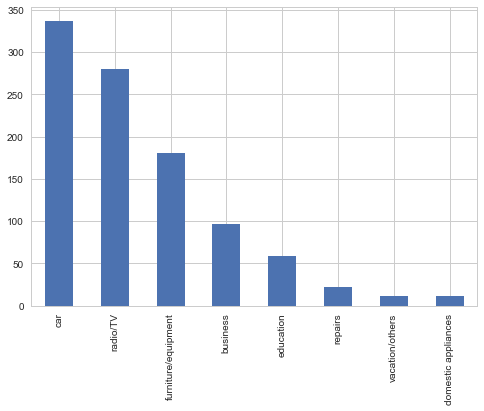

In [10]:
df['Purpose'].value_counts().plot(kind='bar')
plt.show()

When sex=male

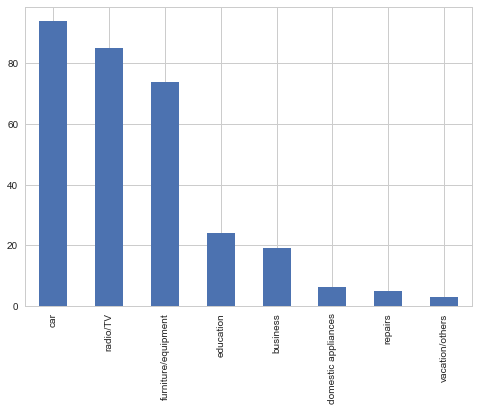

In [11]:
df1 = df[(df.Sex== "female")]
df1['Purpose'].value_counts().plot(kind='bar')
plt.show()

When sex=female

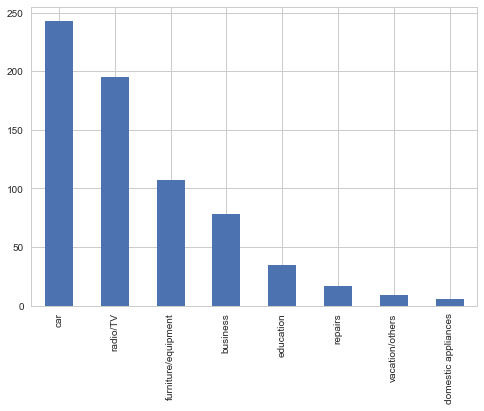

In [12]:
df2 = df[(df.Sex== "male")]
df2['Purpose'].value_counts().plot(kind='bar')
plt.show()

### Credit amount between men and women

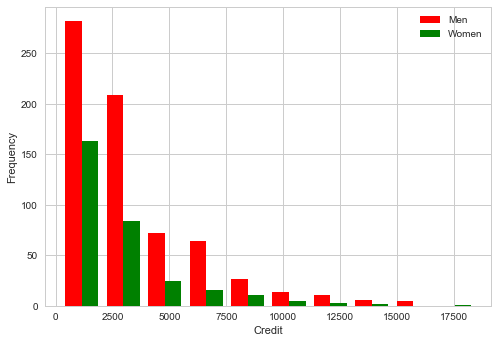

In [13]:
plt.hist([df2['Credit amount'], df1['Credit amount']], color=['red', 'green'])
legend = ['Men', 'Women']
plt.xlabel("Credit")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

In [14]:
df2['Credit amount'].plot.hist(alpha = 0.75)
df1['Credit amount'].plot.hist(alpha = 0.75)
legend = ['Men', 'Women']
plt.xlabel("Credit")
plt.ylabel("Frequency")
plt.legend(legend)


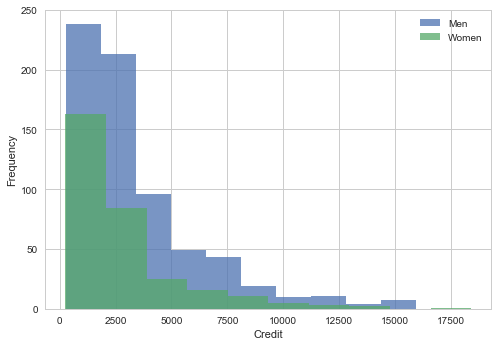

In [15]:
plt.show()

### Credit amount and savings account status

In [16]:
dff1=df[(df['Saving accounts']== "rich")]
dff2=df[(df['Saving accounts']== "quite rich")]
dff3=df[(df['Saving accounts']== "moderate")]
dff4=df[(df['Saving accounts']== "little")]
dff5=df[(df['Saving accounts']== "unknown")]

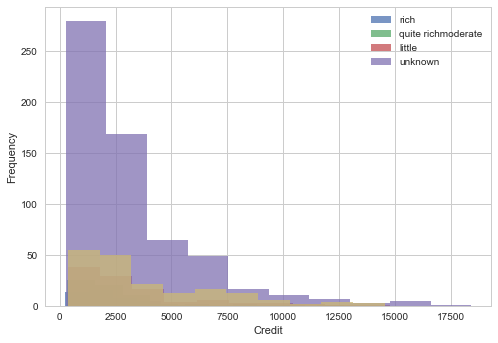

In [17]:
dff1['Credit amount'].plot.hist(alpha = 0.75)
dff2['Credit amount'].plot.hist(alpha = 0.75)
dff3['Credit amount'].plot.hist(alpha = 0.75)
dff4['Credit amount'].plot.hist(alpha = 0.75)
dff5['Credit amount'].plot.hist(alpha = 0.75)
legend = ["rich", "quite rich""moderate","little","unknown"]
plt.xlabel("Credit")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

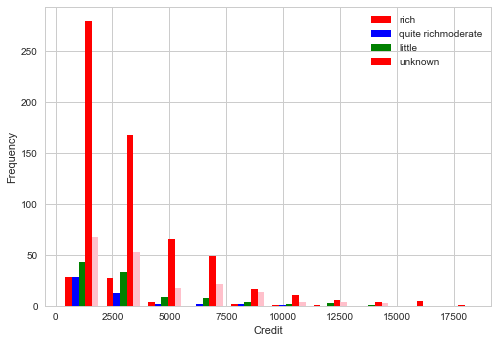

In [17]:
plt.hist([dff2['Credit amount'], dff1['Credit amount'],dff3['Credit amount'],dff4['Credit amount'],dff5['Credit amount']], color=['red','blue','green','red','pink'])
legend = ["rich", "quite rich""moderate","little","unknown"]
plt.xlabel("Credit")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

### Models


We encode the labels

In [18]:
df.replace(('male','female'),(0,1), inplace=True)
df.replace(('own','free','rent'),(0,1,2), inplace=True)
df.replace(('good','bad'),(0,1), inplace=True)
df.replace(('radio/TV', 'education','furniture/equipment', 'car', 'business', 'domestic appliances','repairs','vacation/others'), (0,1,2,3,4,5,6,7),inplace=True)
df.replace(('little', 'moderate', 'quite rich', 'rich','unknown'), (0,1,2,3,4), inplace=True)

In [19]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,4,0,1169,6,0,0
1,22,1,2,0,0,1,5951,48,0,1
2,49,0,1,0,0,4,2096,12,1,0
3,45,0,2,1,0,0,7882,42,2,0
4,53,0,2,1,0,0,4870,24,3,1


### We  predict the Risk with ML models

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
X = df.drop('Risk', 1).values
y = df["Risk"].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

###  We  predict the Risk with SVC

In [23]:
from sklearn.svm import SVC

default_svc = SVC()
default_svc.fit(X_train, y_train)
print("Scoring SVC Classifier...")
score = default_svc.score(X_test, y_test)
print("Score:\n",score)


Scoring SVC Classifier...
Score:
 0.723333333333


###  We  predict the Risk with DecisionTree

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.69333333333333336

### We  predict the Risk with Random forests

In [32]:
model = RandomForestClassifier(n_estimators=10, random_state=0, class_weight="balanced_subsample", )
model.fit(X_train, y_train)

# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.972857142857


In [33]:
pr= model.predict(X_test)
print('The accuracy of the model is: ',accuracy_score(y_test,pr))

The accuracy of the model is:  0.75


###  Logistic Regression

In [35]:
regressor =  LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
print(regressor.score(X_test, y_test))

0.746666666667
